In [1]:
from gensim.models import Phrases
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from pprint import pprint

In [2]:
 wv = KeyedVectors.load("wv")

In [3]:
def transform_word(w):
    return "_".join(w.lower().split())

In [4]:
words = """Sąd Najwyższy
Trybunał Konstytucyjny
kodeks cywilny
kpk
sąd rejonowy
szkoda
wypadek
kolizja
szkoda majątkowa
nieszczęście
rozwód""".splitlines()

words = [transform_word(w) for w in words]

for word in words:
    print(word)
    for s in wv.most_similar(positive=[word])[:3]:
        print(f"\t{s}")
    print()


sąd_najwyższy
	('sad_najwyższy', 0.7680203318595886)
	('trybunał_konstytucyjny', 0.7242528200149536)
	('trybunał', 0.6996279358863831)

trybunał_konstytucyjny
	('trybunał', 0.9071269035339355)
	('prokurator_generalny', 0.757025420665741)
	('marszałek_sejmu', 0.7365344762802124)

kodeks_cywilny
	('kwietnia_1964', 0.5722967982292175)
	('kodeksu_cywilnego', 0.5633471608161926)
	('kodeks_pracy', 0.550175666809082)

kpk
	('2kpk', 0.6971564292907715)
	('1kpk', 0.6838507652282715)
	('kpw', 0.6751440167427063)

sąd_rejonowy
	('sad_rejonowy', 0.8765138387680054)
	('sąd_okręgowy', 0.8641690611839294)
	('sąd_meriti', 0.786108672618866)

szkoda
	('szkoda_ta', 0.7481963038444519)
	('szkoda_majątkowa', 0.7467567324638367)
	('krzywda', 0.6715774536132812)

wypadek
	('przypadek', 0.5509796738624573)
	('skutek', 0.5368135571479797)
	('wypadek_komunikacyjny', 0.5219948291778564)

kolizja
	('kolizja_drogowa', 0.6997689008712769)
	('interwencja_policji', 0.6849738955497742)
	('interwencja', 0.644170582294

In [5]:
positives_negatives = [
    (("Sąd Najwyższy", "konstytucja"), ("kpc",)),
    (("pasażer", "kobieta"), ("mężczyzna",)),
    (("samochód", "rzeka"), ("droga",)),
]

for positives, negatives in positives_negatives:
    positives = [transform_word(p) for p in positives]
    negatives = [transform_word(n) for n in negatives]

    print(" + ".join(positives) + ("  -  " if len(negatives) > 0 else "" )+ "  -  ".join(negatives))
    for s in wv.most_similar(positive=positives, negative=negatives)[:3]:
        print(f"\t{s}")
    print()

sąd_najwyższy + konstytucja  -  kpc
	('trybunał', 0.6028896570205688)
	('trybunał_konstytucyjny', 0.5823222994804382)
	('prokurator_generalny', 0.5655142664909363)

pasażer + kobieta  -  mężczyzna
	('piesza', 0.7144815325737)
	('pasażerka', 0.7127262949943542)
	('kierująca', 0.6991637945175171)

samochód + rzeka  -  droga
	('skuter', 0.5155866146087646)
	('kosiarkę_spalinową', 0.5028166770935059)
	('samochód_marki', 0.4929254353046417)



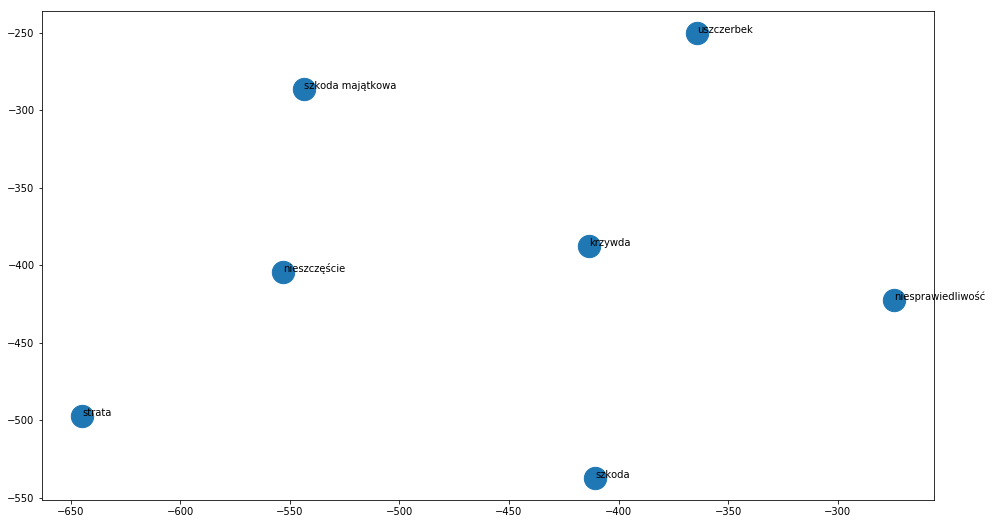

In [8]:
# words = """szkoda
# strata
# uszczerbek
# szkoda majątkowa
# uszczerbek na zdrowiu
# krzywda
# niesprawiedliwość
# nieszczęście
# """.splitlines()

words = """szkoda
strata
uszczerbek
szkoda majątkowa
krzywda
niesprawiedliwość
nieszczęście
""".splitlines()


vectors = [wv[transform_word(w)] for w in words]
vectors_embedded = TSNE(n_components=2, n_iter=5000).fit_transform(vectors)

X, Y =  [x[0] for x in vectors_embedded],  [x[1] for x in vectors_embedded]
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(X, Y, s=500)
for i, txt in enumerate(words):
    ax.annotate(txt, (X[i], Y[i]))
    
plt.show()